In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Social_Network_Ads.csv')
df.sample(3)

,Age,EstimatedSalary,Purchased
142,35,59000,0
23,45,22000,1
35,35,27000,0


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)
x_train.shape, x_test.shape

((280, 2), (120, 2))

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [8]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [9]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [10]:
x_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [42]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [11]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


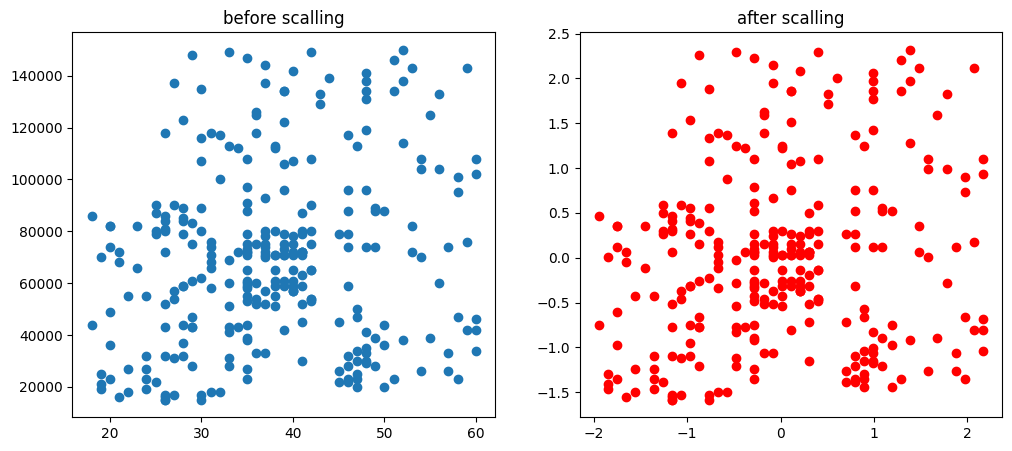

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('before scalling')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'] ,color='red')
ax2.set_title('after scalling')
plt.show()

<Axes: title={'center': 'before scaling'}, xlabel='Age', ylabel='Density'>

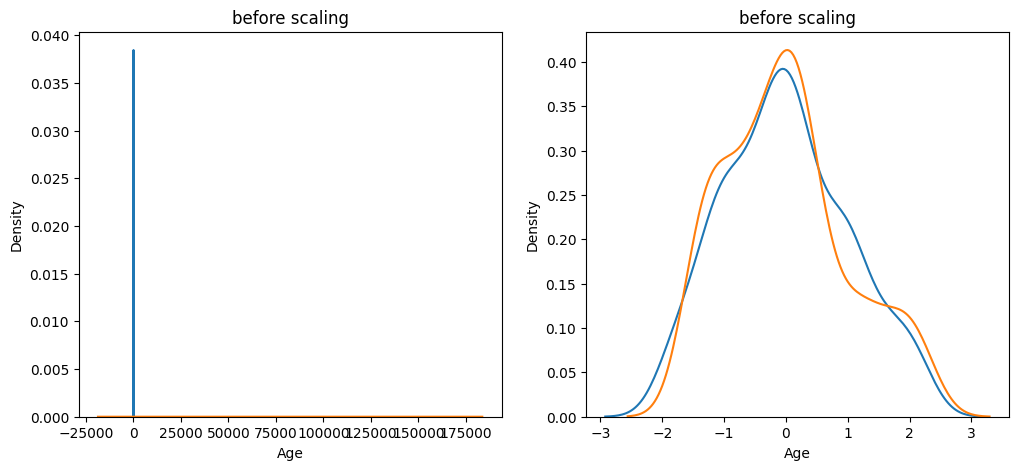

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('before scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title('before scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)

<Axes: title={'center': 'after scaling'}, xlabel='Age', ylabel='Density'>

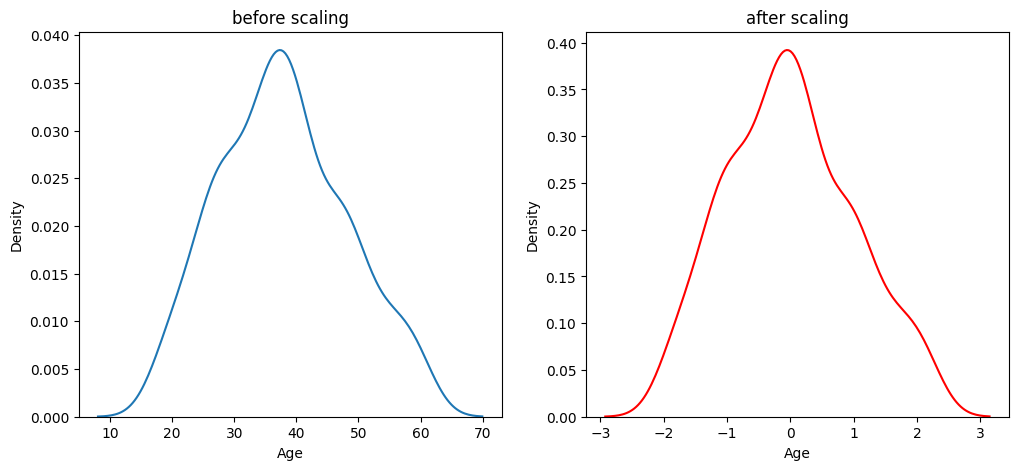

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('before scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

ax2.set_title('after scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2 , color='red')

<Axes: title={'center': 'after scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

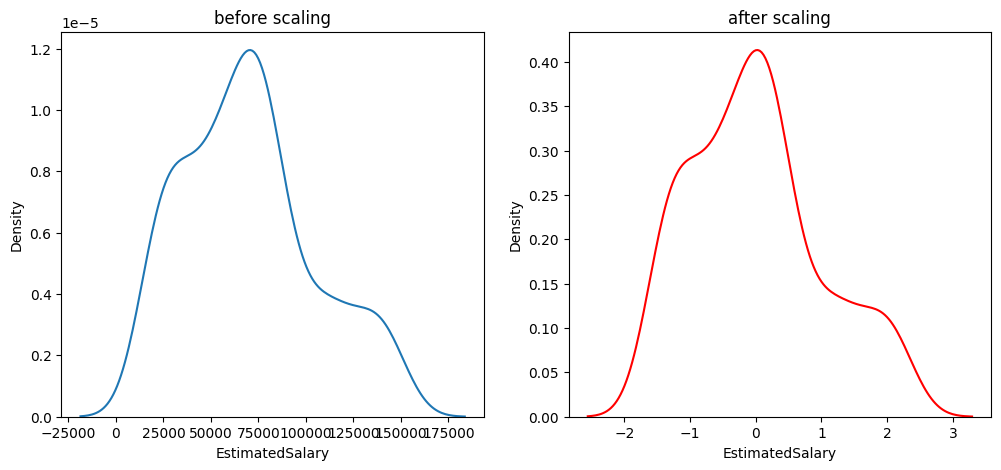

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('before scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title('after scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2 , color='red')

In [24]:
### why scaling is important 

In [26]:
from sklearn.linear_model import LogisticRegression 

In [29]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [30]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [31]:
LogisticRegression()

LogisticRegression()

In [33]:
y_pred = lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
print('Actual', accuracy_score(y_test, y_pred))
print('scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.6583333333333333
scaled 0.8666666666666667


In [37]:
### scaled is not work on decision Tree. 

In [38]:
from sklearn.tree import DecisionTreeClassifier 

In [39]:
dt=DecisionTreeClassifier ()
dt_scaled=DecisionTreeClassifier ()

In [40]:
dt.fit(x_train, y_train)
dt_scaled.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [50]:
DecisionTreeClassifier ()

DecisionTreeClassifier()

In [51]:
y_pred = dt.predict(x_test)
y_pred_scaled=dt_scaled.predict(x_test_scaled)

In [53]:
print('Actual', accuracy_score(y_test, y_pred))
print('scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.875
scaled 0.8666666666666667


In [54]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
### outlier behaveour showing. 

In [60]:
df = pd.concat([df, pd.DataFrame({'Age': [5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [0, 1, 1]})], ignore_index=True)


In [62]:
df.describe()

,Age,EstimatedSalary,Purchased
count,403.000000,403.000000,403.000000
mean,37.846154,70714.640199,0.359801
std,11.255343,37959.790969,0.480539
min,5.000000,1000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,95.000000,350000.000000,1.000000


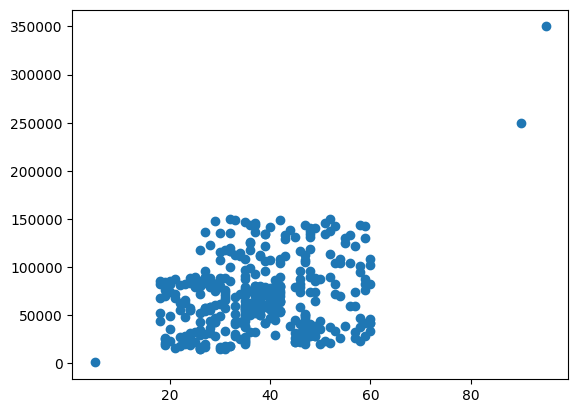

In [63]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)
x_train.shape, x_test.shape

((282, 2), (121, 2))

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [66]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

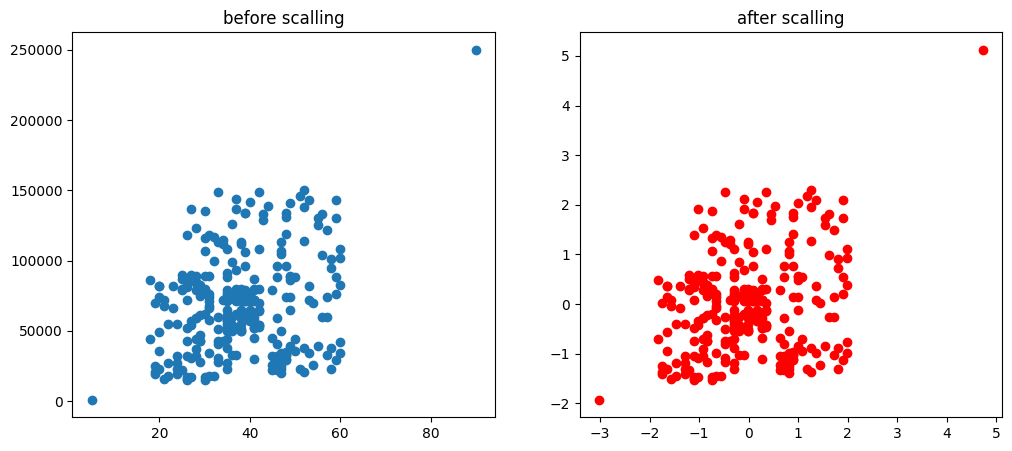

In [67]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('before scalling')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'] ,color='red')
ax2.set_title('after scalling')
plt.show()